# WeatherPy
----

#### Three Observable Trends
1. There is more variation of Max Temp in the southern hemisphere than there is in the northern hemisphere. The lack of consistency could be due to the fact that the southern hemisphere has far less land area than the northern hemisphere.
2. There is very little correlation between humidity and latitude...in either hemispheres.
3. The southern hemisphere has relatively good correlation between wind speed and latitude. As you get closer to the equator wind speeds reduce.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import math as mth
from scipy.stats import linregress
from cmath import sqrt

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

In [4]:
city_number = []
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lon = []
max_temp = []
wind_speed = []



print("Beginning Data Retrieval")
print("-----------------------------")
print('City Number | City Name')

for city in cities:
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    time.sleep(1)
  
    
    try:
        city_number.append(weather_json['id'])
        city_name.append(weather_json['name'])
        cloudiness.append(weather_json['clouds']['all'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        humidity.append(weather_json['main']['humidity'])
        lat.append(weather_json['coord']['lat'])
        lon.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        wind_speed.append(weather_json['wind']['speed'])
        city_ID = weather_json['id']
        
        print(f'{city_ID} | {city}')

    except:
        print('City not found. Skipping...')
        pass

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
City Number | City Name
2167426 | emerald
3899695 | ancud
3466704 | castro
5122534 | jamestown
City not found. Skipping...
1015776 | bredasdorp
4031574 | provideniya
City not found. Skipping...
2206939 | bluff
6170031 | tuktoyaktuk
2062276 | roebourne
1712961 | gigmoto
964420 | port elizabeth
3393692 | itarema
2075265 | busselton
5563839 | fortuna
4030556 | rikitea
5866583 | kodiak
590657 | lihula
1513491 | komsomolskiy
4176380 | venice
559752 | gornozavodsk
1278969 | along
City not found. Skipping...
5312476 | safford
2074865 | carnarvon
2108502 | honiara
4391812 | independence
3831208 | qaanaaq
2126682 | bilibino
1861416 | ishigaki
City not found. Skipping...
2123628 | magadan
933995 | souillac
86049 | jalu
2110227 | butaritari
2155415 | new norfolk
City not found. Skipping...
2246901 | oussouye
3620266 | corn island
286621 | salalah
1650232 | banjar
1525798 | balkhash
149050 | uvinza
3925040 | jaru
934479 | grand gaube
3577430 |

2015352 | terney
3412093 | vestmannaeyjar
2643044 | margate
5975034 | high prairie
542788 | krasnaya gora
2112309 | katsuura
6355222 | yulara
2221046 | yabassi
2427697 | moissala
City not found. Skipping...
City not found. Skipping...
5973108 | hearst
118063 | sabzevar
293842 | gat
1280957 | jiayuguan
135423 | shahrud
5261790 | marathon
2253354 | dakar
3531007 | chiautla
6111862 | port hardy
4231997 | avera
2017979 | petropavlovka
6067472 | marystown
6173361 | vanderhoof
3985710 | cabo san lucas
7341918 | moba
City not found. Skipping...
2123814 | leningradskiy
1328121 | bogale
3576994 | cockburn town
2122614 | okha
City not found. Skipping...
City not found. Skipping...
1106643 | quatre cocos
City not found. Skipping...
City not found. Skipping...
6182001 | wilkie
5870133 | nome
935215 | saint-philippe
2181625 | te anau
1789647 | xichang
2177069 | ballina
1490256 | talnakh
2191562 | dunedin
1632694 | pangkalanbuun
183027 | nyahururu
1501429 | kuminskiy
5563397 | eureka
2027296 | aykha

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {'City': city_name,
               'Cloudiness': cloudiness, 
               'Country': country,
               'Date': date,
               'Humidity': humidity, 
               'Lat': lat, 
               'Lon': lon, 
               'Max Temp': max_temp, 
               'Wind Speed': wind_speed}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Emerald,100,AU,1580365997,44,-23.53,148.17,93.20,14.99
1,Ancud,63,CL,1580365998,100,-41.87,-73.82,42.80,1.12
2,Castro,96,BR,1580366000,99,-24.79,-50.01,64.60,2.77
3,Jamestown,1,US,1580366001,92,42.10,-79.24,21.99,4.70
4,Bredasdorp,63,ZA,1580366003,72,-34.53,20.04,69.01,3.36


In [6]:
weather_data.to_csv(output_data_file, encoding="utf-8", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

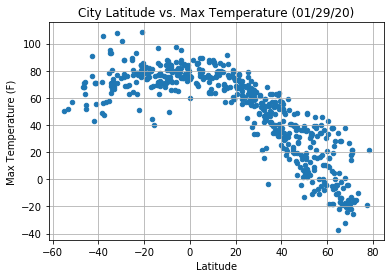

In [7]:
weather_data.plot(kind='scatter', x='Lat', y='Max Temp', grid=True, title='City Latitude vs. Max Temperature (01/29/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

#### Latitude vs. Humidity Plot

(0, 300)

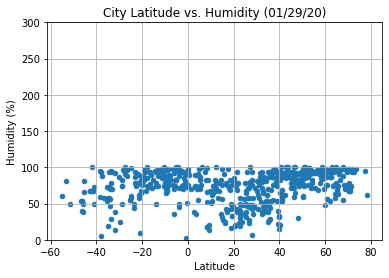

In [8]:
weather_data.plot(kind='scatter', x='Lat', y='Humidity', grid=True, title='City Latitude vs. Humidity (01/29/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0,300)

#### Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

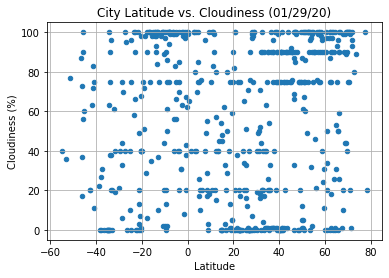

In [9]:
weather_data.plot(kind='scatter', x='Lat', y='Cloudiness', grid=True, title='City Latitude vs. Cloudiness (01/29/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

#### Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

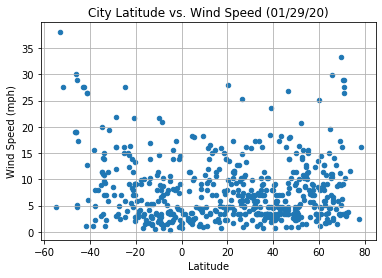

In [10]:
weather_data.plot(kind='scatter', x='Lat', y='Wind Speed', grid=True, title='City Latitude vs. Wind Speed (01/29/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

## Linear Regression

In [11]:
# Create Northern and Southern Hemisphere DataFrames
southern_hemisphere = weather_data[weather_data['Lat'] < 0].dropna()
northern_hemisphere = weather_data[weather_data['Lat'] > 0].dropna()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.9387513457817648j


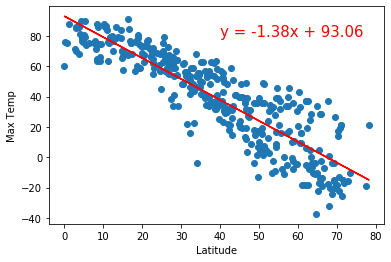

In [20]:
x_n_lat = northern_hemisphere['Lat']
y_n_temp = northern_hemisphere['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_n_lat, y_n_temp)
ntl_regress_values = x_n_lat * slope + intercept
ntl_line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_n_lat, y_n_temp)
plt.plot(x_n_lat, ntl_regress_values, "r-")
plt.annotate(ntl_line_eq, (40,80), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {sqrt(rvalue)}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5649436256465031


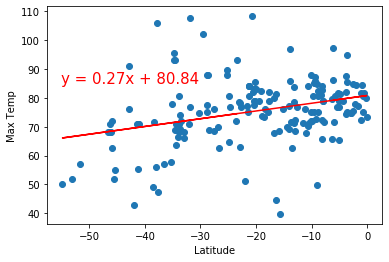

In [21]:
x_s_lat = southern_hemisphere['Lat']
y_s_temp = southern_hemisphere['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_s_lat, y_s_temp)
stl_regress_values = x_s_lat * slope + intercept
stl_line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_s_lat, y_s_temp)
plt.plot(x_s_lat, stl_regress_values, "r-")
plt.annotate(stl_line_eq, (-55,85), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {mth.sqrt(rvalue)}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.6363869789950533


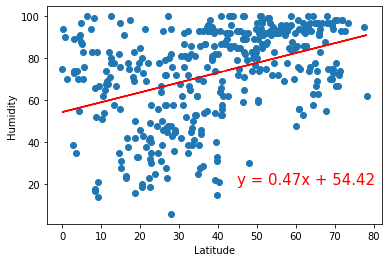

In [14]:
x_n_lat = northern_hemisphere['Lat']
y_n_hum = northern_hemisphere['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_n_lat, y_n_hum)
nth_regress_values = x_n_lat * slope + intercept
nth_line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_n_lat, y_n_hum)
plt.plot(x_n_lat, nth_regress_values, "r-")
plt.annotate(nth_line_eq, (45,20), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {mth.sqrt(rvalue)}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.5875473047917527


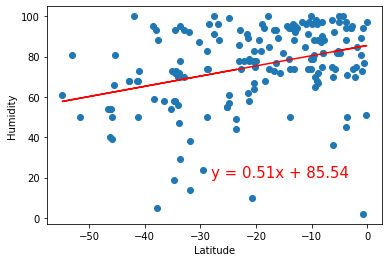

In [23]:
x_s_lat = southern_hemisphere['Lat']
y_s_hum = southern_hemisphere['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_s_lat, y_s_hum)
sth_regress_values = x_s_lat * slope + intercept
sth_line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_s_lat, y_s_hum)
plt.plot(x_s_lat, sth_regress_values, "r-")
plt.annotate(sth_line_eq, (-28,20), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {mth.sqrt(rvalue)}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.5049402058307686


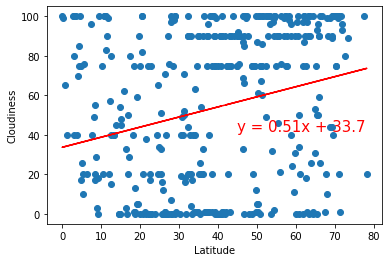

In [16]:
x_n_lat = northern_hemisphere['Lat']
y_n_clo = northern_hemisphere['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_n_lat, y_n_clo)
ntc_regress_values = x_n_lat * slope + intercept
ntc_line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_n_lat, y_n_clo)
plt.plot(x_n_lat, ntc_regress_values, "r-")
plt.annotate(ntc_line_eq, (45,42), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {mth.sqrt(rvalue)}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.556244318518535


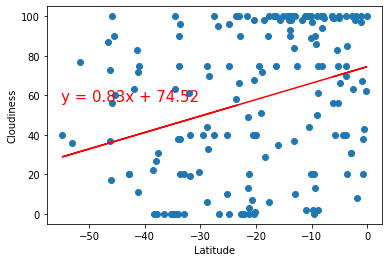

In [17]:
x_s_lat = southern_hemisphere['Lat']
y_s_clo = southern_hemisphere['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_s_lat, y_s_clo)
stc_regress_values = x_s_lat * slope + intercept
stc_line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_s_lat, y_s_clo)
plt.plot(x_s_lat, stc_regress_values, "r-")
plt.annotate(stc_line_eq, (-55,57), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {mth.sqrt(rvalue)}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.35617550466371695


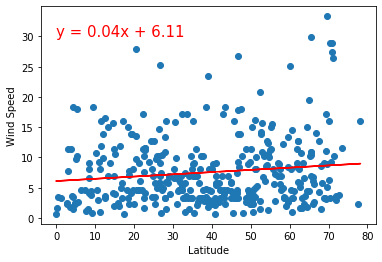

In [25]:
x_n_lat = northern_hemisphere['Lat']
y_n_ws = northern_hemisphere['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_n_lat, y_n_ws)
ntw_regress_values = x_n_lat * slope + intercept
ntw_line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_n_lat, y_n_ws)
plt.plot(x_n_lat, ntw_regress_values, "r-")
plt.annotate(ntw_line_eq, (0,30), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {mth.sqrt(rvalue)}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.6744729542481248j


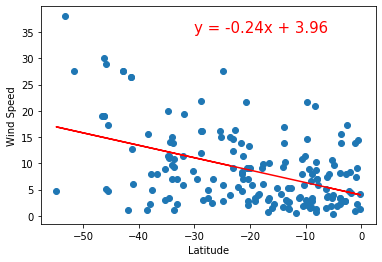

In [26]:
x_s_lat = southern_hemisphere['Lat']
y_s_ws = southern_hemisphere['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_s_lat, y_s_ws)
stw_regress_values = x_s_lat * slope + intercept
stw_line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_s_lat, y_s_ws)
plt.plot(x_s_lat, stw_regress_values, "r-")
plt.annotate(stw_line_eq, (-30,35), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {sqrt(rvalue)}")
plt.show()